# Class 13 – Understanding ML Workflow
**Objective**: Understand the key steps of a machine learning workflow, including:
- Data collection
- Preprocessing
- Model selection
- Training
- Evaluation

Also, learn essential ML terms and build an end-to-end ML pipeline using the Titanic dataset.

## 1. Introduction to the ML Workflow

### Key Steps:
1. **Data Collection**: Gathering relevant data (e.g., Titanic passenger info).
2. **Preprocessing**: Cleaning and preparing data (handle missing values, encode categories, etc.).
3. **Model Selection**: Choose algorithm (Random Forest, Logistic Regression, etc.).
4. **Training**: Let the model learn from the training data.
5. **Evaluation**: Check how well the model performs.

### Key ML Terminologies:
- **Features**: Input variables (e.g., Age, Fare).
- **Labels**: Output/target variable (e.g., Survived).
- **Training Set**: Used to train the model.
- **Test Set**: Used to evaluate the model.
- **Overfitting**: Model is too good on training but poor on test data.
- **Cross-validation**: Repeatedly split and test data to improve reliability.

## 2. Build an End-to-End ML Pipeline

### Step 1: Import Libraries
We'll use pandas, sklearn, and matplotlib.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Step 2: Load the Titanic Dataset
Make sure the `titanic.csv` file is in your working directory.

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Step 3: Preprocess the Data
We'll:
- Remove rows with missing values in important columns
- Convert 'Sex' to numbers (male: 0, female: 1)


In [4]:
data.shape

(418, 12)

In [22]:
data.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
409,1301,1,3,1,3.0,1,1,13.775,S
411,1303,1,1,1,37.0,1,0,90.000,Q
412,1304,1,3,1,28.0,0,0,7.775,S
414,1306,1,1,1,39.0,0,0,108.900,C
415,1307,0,3,0,38.5,0,0,7.250,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
# Drop only irrelevant and highly missing columns
data = data.drop(columns=['Name', 'Ticket', 'Cabin'])
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [18]:
# Fill missing 'Fare' values with the most common one
data['Fare'] = data['Fare'].fillna(data['Fare'].mode()[0])

In [19]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Filling "Age" column with median value
data['Age'] = data['Age'].fillna(data['Age'].median())


In [8]:
data.shape

(331, 12)

In [ ]:
# Filling with Median Age by Pclass & Sex
data['Age'] = data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))


In [ ]:
# Encode 'Sex': male = 0, female = 1
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data.head()

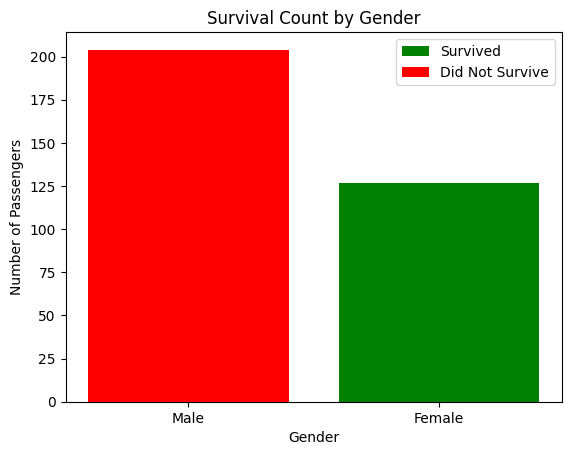

In [24]:
import matplotlib.pyplot as plt

# Count survivors by gender
male_survived = data[(data['Sex'] == 0) & (data['Survived'] == 1)].shape[0]
male_not_survived = data[(data['Sex'] == 0) & (data['Survived'] == 0)].shape[0]
female_survived = data[(data['Sex'] == 1) & (data['Survived'] == 1)].shape[0]
female_not_survived = data[(data['Sex'] == 1) & (data['Survived'] == 0)].shape[0]

# Set up data
labels = ['Male', 'Female']
survived = [male_survived, female_survived]
not_survived = [male_not_survived, female_not_survived]

# Plotting
x = [0, 1]
plt.bar(x, survived, color='green', label='Survived')
plt.bar(x, not_survived, bottom=survived, color='red', label='Did Not Survive')

# Labels and legend
plt.xticks(x, labels)
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.title("Survival Count by Gender")
plt.legend()
plt.show()


### Step 4: Select Features and Labels
We will use `Pclass`, `Age`, `Fare`, and `Sex` to predict `Survived`.

In [11]:
X = data[['Pclass', 'Age', 'Fare', 'Sex']]
y = data['Survived']

### Step 5: Split Data into Training and Test Sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 6: Model Selection and Training

In [13]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

### Step 7: Model Evaluation
Let's test the model on test data.

In [14]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


## 3. Model Evaluation and Fine-Tuning

### Cross-Validation
Cross-validation helps us better understand our model performance on different subsets of data.

In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean() * 100:.2f}%")

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 100.00%


### Overfitting vs Underfitting
- **Overfitting**: Model memorizes the training data. Poor generalization.
- **Underfitting**: Model is too simple. Can't capture patterns.

Use **cross-validation** and **simpler or regularized models** to fix.

## 4. Wrap-Up and Homework

### Recap:
- Understood ML workflow: collection → preprocessing → training → evaluation
- Built full pipeline on Titanic dataset
- Learned about overfitting, cross-validation, hyperparameter tuning

### Homework:
- Use another dataset like Iris or Breast Cancer from sklearn
- Build a similar pipeline
- Try different models: LogisticRegression, KNeighborsClassifier
- Use cross-validation to compare models
